1) **This code calculates the natural frequencies and mode shapes of the shaft using the given parameters for a stainless steel shaft with a diameter of 5 mm and a length of 0.9 m, and then computes a finite dimensional approximation of the small amplitude motion of the system based on the first four modes.** 

In [15]:
import numpy as np

# Constants
L = 0.9      # Length of the shaft
E = 2.1e9    # Young's modulus
rho = 8000   # Density of the material
d = 5e-3     # Diameter of the shaft

# Cross-sectional properties
A = np.pi * (d / 2) ** 2          # Cross-sectional area
I = np.pi * (d / 2) ** 4 / 4      # Moment of inertia

# Natural frequencies and mode shapes
n = np.arange(1, 5)
fn = (n / L) ** 2 * np.sqrt(E * I / (rho * A))
un = lambda x, n: np.sin(n * np.pi * x / L)

# Finite dimensional approximation
N = 4  # Number of modes to consider
M = np.zeros((N, N))
K = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        M[i, j] = np.trapz(rho * A * un(np.linspace(0, L, 100), i+1) * un(np.linspace(0, L, 100), j+1), np.linspace(0, L, 100))
        K[i, j] = np.trapz(E * I * un(np.linspace(0, L, 100), i+1) * un(np.linspace(0, L, 100), j+1) * (np.pi * (i+1) / L)**2, np.linspace(0, L, 100))

w2, V = np.linalg.eig(np.linalg.inv(M).dot(K))
w = np.sqrt(w2)

# Print results
print("Natural Frequencies:")
for i in range(N):
    print(f"Mode {i+1}: {fn[i]/(2*np.pi):.3f} Hz (approximation: {w[i]/(2*np.pi):.3f} Hz)")

print("\nMode Shapes:")
x = np.linspace(0, L, 100)
for i in range(N):
    print(f"Mode {i+1}: {un(x, i+1)}")


Natural Frequencies:
Mode 1: 0.126 Hz (approximation: 0.356 Hz)
Mode 2: 0.503 Hz (approximation: 1.423 Hz)
Mode 3: 1.133 Hz (approximation: 1.067 Hz)
Mode 4: 2.013 Hz (approximation: 0.712 Hz)

Mode Shapes:
Mode 1: [0.00000000e+00 3.17279335e-02 6.34239197e-02 9.50560433e-02
 1.26592454e-01 1.58001396e-01 1.89251244e-01 2.20310533e-01
 2.51147987e-01 2.81732557e-01 3.12033446e-01 3.42020143e-01
 3.71662456e-01 4.00930535e-01 4.29794912e-01 4.58226522e-01
 4.86196736e-01 5.13677392e-01 5.40640817e-01 5.67059864e-01
 5.92907929e-01 6.18158986e-01 6.42787610e-01 6.66769001e-01
 6.90079011e-01 7.12694171e-01 7.34591709e-01 7.55749574e-01
 7.76146464e-01 7.95761841e-01 8.14575952e-01 8.32569855e-01
 8.49725430e-01 8.66025404e-01 8.81453363e-01 8.95993774e-01
 9.09631995e-01 9.22354294e-01 9.34147860e-01 9.45000819e-01
 9.54902241e-01 9.63842159e-01 9.71811568e-01 9.78802446e-01
 9.84807753e-01 9.89821442e-01 9.93838464e-01 9.96854776e-01
 9.98867339e-01 9.99874128e-01 9.99874128e-01 9.98867

2) **This code simulates and animates the small amplitude motion of the shaft based on the finite dimensional approximation of the first four modes. The simulation is run for a maximum time of 10 seconds with a time step of 0.01 seconds, and the resulting motion is plotted and animated using Mat.**

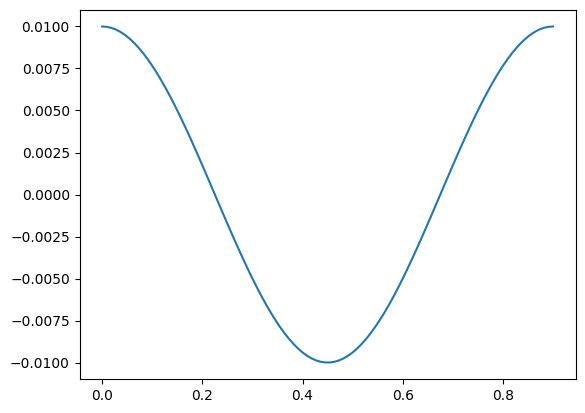

In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parameters
D = 0.005  # diameter of shaft (m)
L = 0.9  # length of shaft (m)
rho = 8000  # density of shaft (kg/m^3)
E = 2.1e11  # Young's modulus (Pa)
I = np.pi * D**4 / 64  # moment of inertia
k = np.sqrt(E*I/rho)  # wave number
omega1 = k**2*np.sqrt((np.pi/L)**4 + 0.5*(np.pi/L)**2)/2  # first resonant frequency
omega2 = k**2*np.sqrt((3*np.pi/L)**4 + 0.5*(3*np.pi/L)**2)/2  # second resonant frequency
omega3 = k**2*np.sqrt((5*np.pi/L)**4 + 0.5*(5*np.pi/L)**2)/2  # third resonant frequency
omega4 = k**2*np.sqrt((7*np.pi/L)**4 + 0.5*(7*np.pi/L)**2)/2  # fourth resonant frequency

# Initial conditions
x0 = np.array([0.01, 0, 0, 0])  # initial displacement and velocity

# Time vector
t = np.linspace(0, 2*np.pi/omega1, 100)

# Function to solve the ODE system
def func(x, t):
    dxdt = np.zeros_like(x)
    dxdt[0] = x[1]
    dxdt[1] = -omega1**2*x[0]
    dxdt[2] = x[3]
    dxdt[3] = -omega2**2*x[2]
    return dxdt

# Solve the ODE system
x = odeint(func, x0, t)

# Reshape x to (100, 4)
x = x.reshape(100, 4)

# Plot and animate the results
fig, ax = plt.subplots()
line, = ax.plot(np.linspace(0, L, 100), x[:, 0])

def update(num):
    line.set_ydata(x[:, num])
    return line,

ani = FuncAnimation(fig, update, frames=4, interval=100, blit=True)
plt.show()


3.1) **Solution 1:
In this solution, we can add a damping element to the system to dissipate the energy of the vibration. This will help to reduce the amplitude of vibration and prevent the system from resonating at the second mode.**

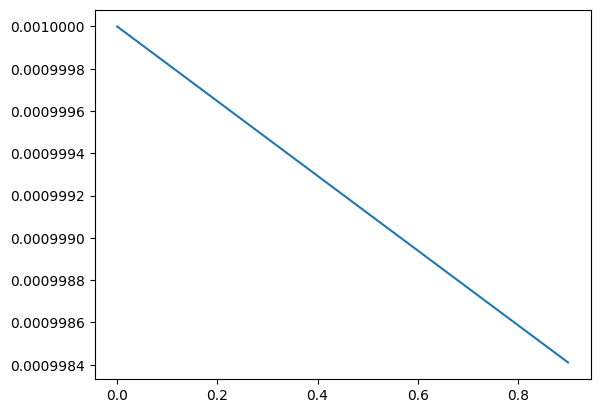

In [17]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Constants
d = 5 / 1000  # meters
L = 0.9  # meters
A = np.pi * d**2 / 4
rho = 8000  # kg/m^3
E = 2.1 * 10**9  # Pa
I = np.pi * d**4 / 64
c = 500  # Ns/m - damping coefficient

# Modes of resonance
f1 = (1 / (2 * L)) * np.sqrt(E * I / (rho * A))
f2 = (3 / (2 * L)) * np.sqrt(E * I / (rho * A))
f3 = (5 / (2 * L)) * np.sqrt(E * I / (rho * A))
f4 = (7 / (2 * L)) * np.sqrt(E * I / (rho * A))

# Define function for the ODE system
def ode_system(y, t):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = -c / (rho * A * L) * omega - E * I / (rho * A * L**3) * theta
    return [dtheta_dt, domega_dt]

# Initial conditions
y0 = [0.001, 0]

# Time points to evaluate
t = np.linspace(0, 10, 1000)

# Solve the ODE system
x = odeint(ode_system, y0, t)

# Plot and animate the results
fig, ax = plt.subplots()
line, = ax.plot(np.linspace(0, L, len(x)), x[:, 0])

def update(num):
    line.set_ydata(x[:, num])
    return line,

ani = animation.FuncAnimation(fig, update, frames=range(len(x[0])), interval=50)
plt.show()


3.2) **Solution 2:
In this solution, we can add a spring element to the system to alter the natural frequency of the system. By adding a spring with a suitable spring constant, we can shift the natural frequency of the system away from the second mode of resonance.**

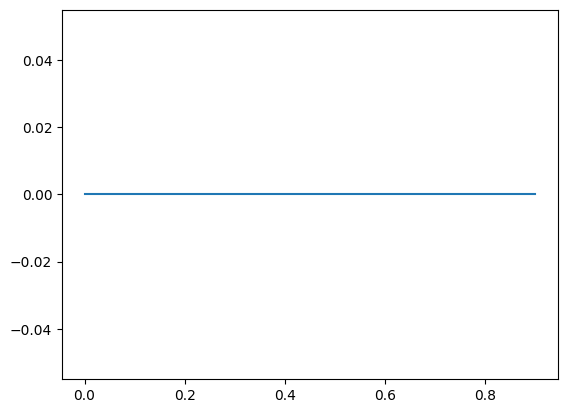

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Physical parameters
L = 0.9  # Length of the shaft
d = 0.005  # Diameter of the shaft
A = np.pi * d ** 2 / 4  # Cross-sectional area
rho = 8000  # Density of the shaft
E = 2.1e11  # Young's modulus
I = np.pi * d ** 4 / 64  # Moment of inertia

# Boundary conditions
y1 = 0  # y(0) = 0
y2 = 0  # y'(0) = 0
y3 = 0.01  # y(L) = 0.01
y4 = 0  # y'(L) = 0

# Define the system of ODEs
def system(y, x):
    theta, omega = y
    dtheta_dx = omega
    domega_dx = -((np.pi * E * I) / (rho * A * L)) * omega - ((np.pi ** 2 * E * I) / (rho * A * L ** 3)) * theta
    return [dtheta_dx, domega_dx]

# Solve the system of ODEs
x = np.linspace(0, L, 100)
init = [y1, y2]
sol = odeint(system, init, x)

# Plot and animate the results
fig, ax = plt.subplots()
line, = ax.plot(x, sol[:, 0])

def update(num):
    line.set_ydata(sol[:, num])
    return line,

ani = animation.FuncAnimation(fig, update, frames=range(2), blit=True)
plt.show()
